<a href="https://colab.research.google.com/github/TheBlackRus/liveproject_HumanPoseEstimation/blob/master/liveproject_humanpose_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 01 Download the data

In [0]:
!wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat



--2020-04-26 14:38:30--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat.1’

train_32x32.mat.1   100%[===================>] 173.61M  39.5MB/s    in 5.6s    

2020-04-26 14:38:36 (30.9 MB/s) - ‘train_32x32.mat.1’ saved [182040794/182040794]

--2020-04-26 14:38:37--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64275384 (61M) [text/plain]
Saving to: ‘test_32x32.mat.1’

test_32x32.mat.1    100%[===================>]  61.30M  21.4MB/s    in 2.9s    

2020-04-26 14:38:40 (21.4 MB/s) - ‘test_32x32.mat.1’ saved [642

In [0]:
# 02 display the data

In [0]:
from scipy.io import loadmat
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

Digital Label [1]


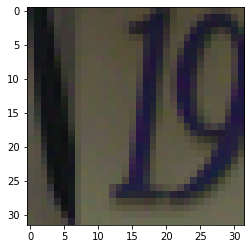

In [0]:
from matplotlib.pyplot import imshow

X = train["X"]
y = train["y"]
example = 0
assert(example < y.shape[0])

print("Digital Label", y[example][0])
imshow(X[:,:,:,example])

In [0]:
# 03 COCO

In [0]:
# This code downloads the coco dataset from Amazon S3 in parallel.
import boto3
from botocore import UNSIGNED
from botocore.client import Config
import multiprocessing
import subprocess
files = ['val2017.zip', 'annotations_trainval2017.zip', 'train2017.zip']

s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
def download_and_unzip_from_s3(file_name, bucket_name='fast-ai-coco'):
    print("Downloading", file_name)
    s3.download_file(bucket_name, file_name, file_name)
    print("Finished downloading", file_name, ". Starting to unzip.")
    subprocess.run(["unzip", file_name])
    print("Finished unzipping", file_name)

# Download in parallel
num_cpus = multiprocessing.cpu_count()
with multiprocessing.Pool(num_cpus) as p:
    p.map(download_and_unzip_from_s3, files)

print("Done transferring all datasets")

Finished downloading annotations_trainval2017.zip . Starting to unzip.
Finished downloading val2017.zip . Starting to unzip.
Finished unzipping annotations_trainval2017.zip
Finished unzipping val2017.zip
Finished downloading train2017.zip . Starting to unzip.
Finished unzipping train2017.zip
Done transferring all datasets


In [0]:
import json
file_name = "annotations//person_keypoints_val2017.json"
with open(file_name, 'r') as json_raw:
    meta = json.load(json_raw)



In [0]:
meta.keys()


dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [0]:
example = 0
img_info = meta["images"][example]
img_annot = meta["annotations"][example]
img_cato = meta["categories"][0]["keypoints"]

In [105]:
meta["categories"]['keypoints']

[{'id': 1,
  'keypoints': ['nose',
   'left_eye',
   'right_eye',
   'left_ear',
   'right_ear',
   'left_shoulder',
   'right_shoulder',
   'left_elbow',
   'right_elbow',
   'left_wrist',
   'right_wrist',
   'left_hip',
   'right_hip',
   'left_knee',
   'right_knee',
   'left_ankle',
   'right_ankle'],
  'name': 'person',
  'skeleton': [[16, 14],
   [14, 12],
   [17, 15],
   [15, 13],
   [12, 13],
   [6, 12],
   [7, 13],
   [6, 7],
   [6, 8],
   [7, 9],
   [8, 10],
   [9, 11],
   [2, 3],
   [1, 2],
   [1, 3],
   [2, 4],
   [3, 5],
   [4, 6],
   [5, 7]],
  'supercategory': 'person'}]

In [0]:
print(img_info.keys())
print(img_annot.keys())

dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id'])
dict_keys(['segmentation', 'num_keypoints', 'area', 'iscrowd', 'keypoints', 'image_id', 'bbox', 'category_id', 'id'])


In [0]:
img_file = str(img_annot["image_id"])
img_file = img_file.zfill(12) +".jpg" #img_info["file_name"]
print(img_file, img_annot["image_id"])

000000425226.jpg 425226


(640, 480, 3) 73.35 206.02 300.58 372.5
(372, 300, 3)


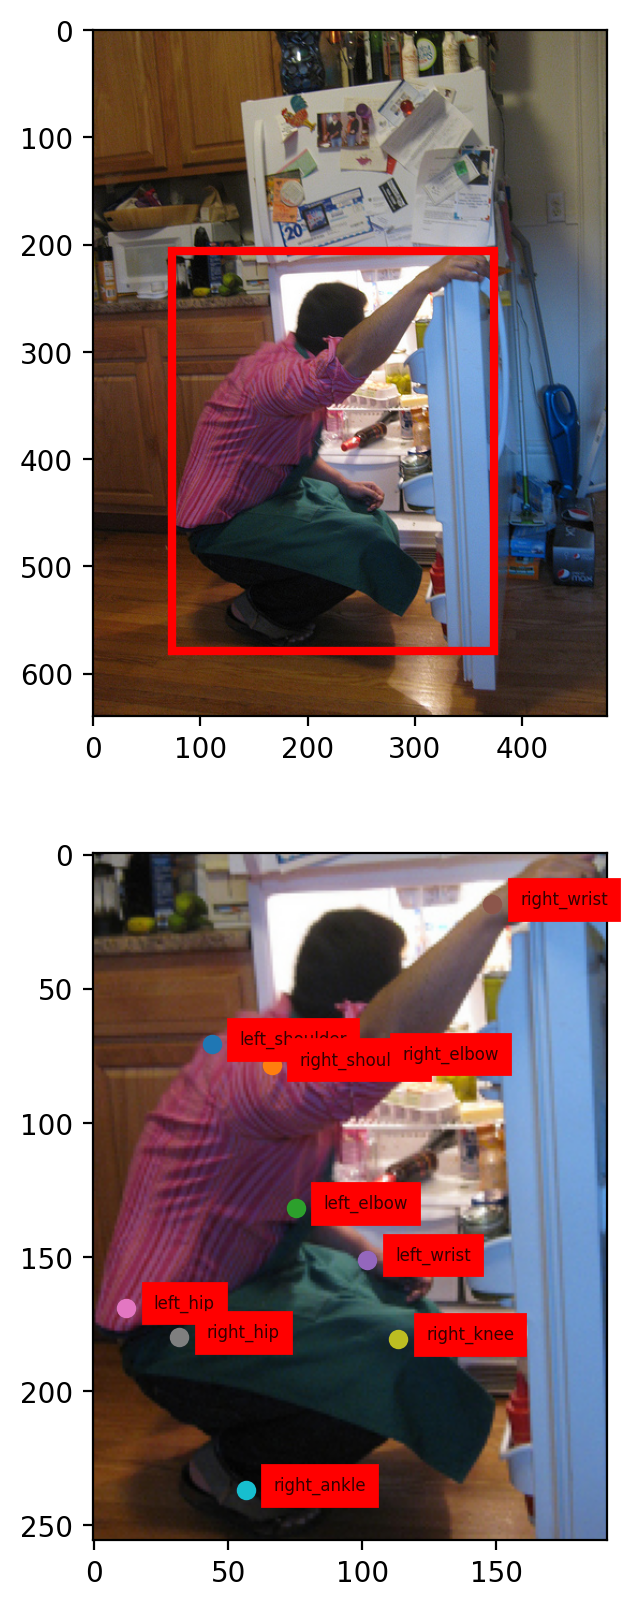

In [137]:
%matplotlib inline
#from matplotlib.pyplot import imshow
from matplotlib import image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
img = image.imread("val2017//"+img_file)
fig,ax = plt.subplots(2,figsize=(20,10))
fig.set_dpi(200)

ax[0].imshow(img)

start_x,start_y, w,h = img_annot["bbox"]



r = patches.Rectangle((start_x,start_y),w,h,linewidth=3,edgecolor='r',facecolor='None')
ax[0].add_patch(r)



print(img.shape,start_x,start_y,w,h)
img_crop = img[int(start_y):(int(start_y+h)),int(start_x):int(start_x+w),:]
print(img_crop.shape)
img_crop = cv2.resize(img_crop,(192,256))
sx = 192/w 
sy = 256/h
ax[1].imshow(img_crop)
keypoints = img_annot["keypoints"]
for i in range(len(keypoints)//3):
  x = (keypoints[i*3]-start_x)*sx
  y = (keypoints[i*3+1]-start_y)*sy
  v = keypoints[i*3+2]
  if v:
    # ax.text(x, y, "x")
    label = "Key"
    ax[1].scatter(x,y)
    
    ax[1].annotate(img_cato[i], # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 size=6,
                 xytext=(10,0), # distance from text to points (x,y)
                 ha='left',
                 alpha=0.8,
                 backgroundcolor="r")
    
plt.show()

In [0]:
img_annot["bbox"]

[73.35, 206.02, 300.58, 372.5]

In [0]:
img_info

{'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg',
 'date_captured': '2013-11-14 17:02:52',
 'file_name': '000000397133.jpg',
 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg',
 'height': 427,
 'id': 397133,
 'license': 4,
 'width': 640}

In [0]:
img_annot

{'area': 47803.27955,
 'bbox': [73.35, 206.02, 300.58, 372.5],
 'category_id': 1,
 'id': 183126,
 'image_id': 425226,
 'iscrowd': 0,
 'keypoints': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  142,
  309,
  1,
  177,
  320,
  2,
  191,
  398,
  2,
  237,
  317,
  2,
  233,
  426,
  2,
  306,
  233,
  2,
  92,
  452,
  2,
  123,
  468,
  2,
  0,
  0,
  0,
  251,
  469,
  2,
  0,
  0,
  0,
  162,
  551,
  2],
 'num_keypoints': 10,
 'segmentation': [[125.12,
   539.69,
   140.94,
   522.43,
   100.67,
   496.54,
   84.85,
   469.21,
   73.35,
   450.52,
   104.99,
   342.65,
   168.27,
   290.88,
   179.78,
   288,
   189.84,
   286.56,
   191.28,
   260.67,
   202.79,
   240.54,
   221.48,
   237.66,
   248.81,
   243.42,
   257.44,
   256.36,
   253.12,
   262.11,
   253.12,
   275.06,
   299.15,
   233.35,
   329.35,
   207.46,
   355.24,
   206.02,
   363.87,
   206.02,
   365.3,
   210.34,
   373.93,
   221.84,
   363.87,
   226.16,
   363.87,
   237.66,